# define phase plot function

inputs: rho - 1/duration in I compartments
        ka -  cross immunity parameter
        beta - 

The output will show the phase plots of I compartments.


In [7]:
PhasePlot[rho_, ka_, beta_] := Module[{eqs, fns, ls, sol},
   eqs = {
     s[t_] = {s1[t], s2[t], s3[t], s4[t]};
     i[t_] = {i1[t], i2[t], i3[t], i4[t]};
     x[t_] = {x1[t], x2[t], x3[t], x4[t]};
     z[t_] = {z1[t], z2[t], z3[t], z4[t]};
     
     npop = 2.0 10^7;
     a = 0.2;
     \[Phi] = 6.69;
     \[Tau] = {52.0, 52.0, 52.0, 52.0};
     \[Rho] = {rho, rho, rho, rho};
     \[Mu] = 1/70.;
     \[Alpha] = {
       {1, 0, 0, 0},
       {0, 1, 0, 0},
       {0, 0, 1, 0},
       {0, 0, 0, 1}
       };
     \[Beta] = beta;
     (*{478.0,495.0,488.0,465.0};*)
     (*ka=0.0;*)
     {{\[Alpha]11, \[Alpha]12, \[Alpha]13, \[Alpha]14},
       {\[Alpha]21, \[Alpha]22, \[Alpha]23, \[Alpha]24},
       {\[Alpha]31, \[Alpha]32, \[Alpha]33, \[Alpha]34},
       {\[Alpha]41, \[Alpha]42, \[Alpha]43, \[Alpha]44}} = \[Alpha] \
/. {0 -> ka};
     
     \[Lambda][t_] = (1 + a Cos[2 \[Pi] (t - \[Phi]/12)]) \[Beta] i[t];
     {\[Lambda]1[t], \[Lambda]2[t], \[Lambda]3[t], \[Lambda]4[
        t]} = \[Lambda][t];
     
     \[CapitalLambda][
       t_] = \[Lambda][
         t] (1 - Total@(x[t]/npop) + x[t]/npop) + {\[Lambda]1[
          t] ((x1[t]/npop - \[Alpha]11 x1[t]/npop) + (x2[t]/
             npop - \[Alpha]21 x2[t]/npop) + (x3[t]/
             npop - \[Alpha]31 x3[t]/npop) + (x4[t]/
             npop - \[Alpha]41 x4[t]/npop)), \[Lambda]2[
          t] ((x1[t]/npop - \[Alpha]12 x1[t]/npop) + (x2[t]/
             npop - \[Alpha]22 x2[t]/npop) + (x3[t]/
             npop - \[Alpha]32 x3[t]/npop) + (x4[t]/
             npop - \[Alpha]42 x4[t]/npop)), \[Lambda]3[
          t] ((x1[t]/npop - \[Alpha]13 x1[t]/npop) + (x2[t]/
             npop - \[Alpha]23 x2[t]/npop) + (x3[t]/
             npop - \[Alpha]33 x3[t]/npop) + (x4[t]/
             npop - \[Alpha]43 x4[t]/npop)), \[Lambda]4[
          t] ((x1[t]/npop - \[Alpha]14 x1[t]/npop) + (x2[t]/
             npop - \[Alpha]24 x2[t]/npop) + (x3[t]/
             npop - \[Alpha]34 x3[t]/npop) + (x4[t]/
             npop - \[Alpha]44 x4[t]/npop))};
     
     s'[t] == -\[CapitalLambda][t] s[t]/npop + \[Mu] npop - \[Mu] s[t],
     i'[t] == \[CapitalLambda][t] s[t]/npop - \[Tau] i[t] - \[Mu] i[t],
     x'[t] == \[Tau] i[t] - \[Rho] x[t] - \[Mu] x[t],
     z'[t] == \[Rho] x[t] - \[Mu] z[t],
     s[0] == {npop - 1, npop - 1, npop - 1, npop - 1},
     i[0] == {1, 1, 1, 1},
     x[0] == {0, 0, 0, 0},
     z[0] == {0, 0, 0, 0}
     };
   sol = Quiet[
     NDSolve[SetPrecision[eqs, Infinity], {s[t], i[t], x[t], 
       z[t]}, {t, 0, 10}, PrecisionGoal -> ControlActive[4, 8], 
      WorkingPrecision -> ControlActive[MachinePrecision, 20], 
      Method -> "StiffnessSwitching"]];
   fns = (i[t] /. sol)~Join~(D[i[t] /. sol, t])\[Transpose];
   ls = Table[
     Table[fns[[j]] /. t -> i, {i, 0, 10, 0.01}], {j, 1, 4, 1}];
   Table[ListPlot[ls[[j]], Joined -> True, Ticks -> None, 
     PlotRange -> Automatic, PlotStyle -> Black, ImageSize -> Small, 
     AxesStyle -> Red], {j, 4}]
   ];



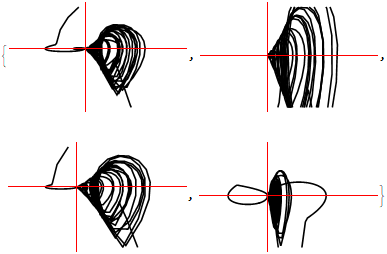

In [5]:
PhasePlot[0.5, 0, {478.0, 495.0, 488.0, 465.0}]


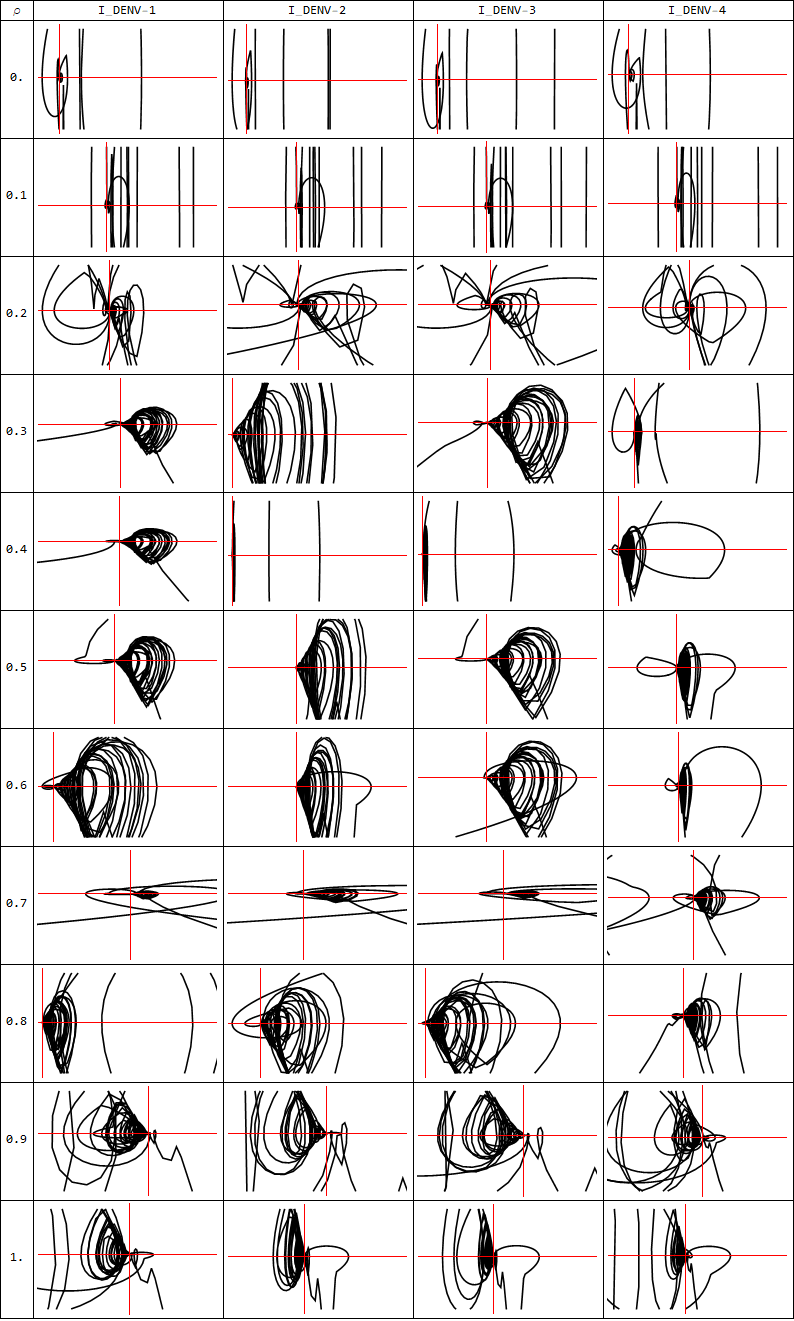

In [6]:
Grid[Prepend[
  Table[{j}~Join~PhasePlot[j, 0, {478.0, 495.0, 488.0, 465.0}], {j, 0,
     1, 0.1}], {"\[Rho]", "I_DENV-1", "I_DENV-2", "I_DENV-3", 
   "I_DENV-4"}], Frame -> All]


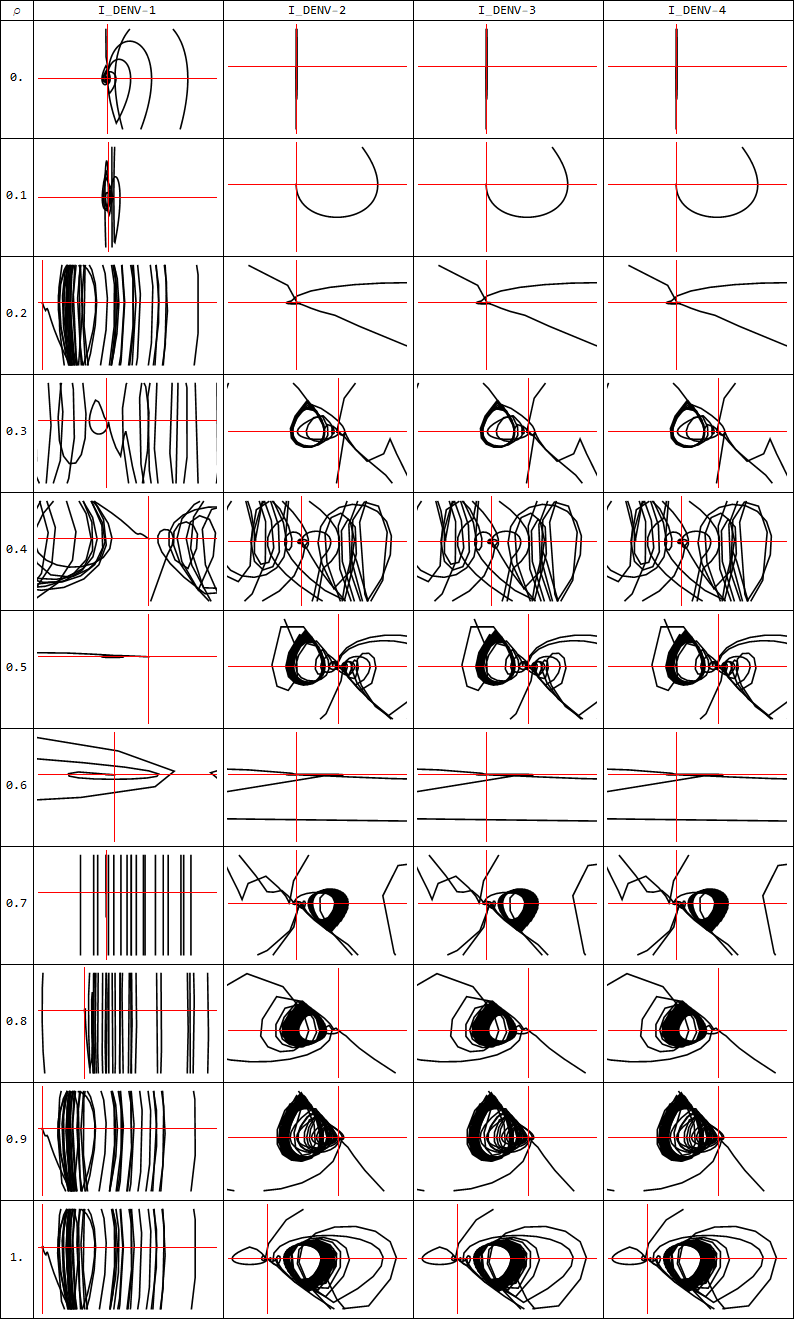

In [8]:
Grid[Prepend[
  Table[{j}~Join~PhasePlot[j, 1, {400.0, 0.0, 0.0, 0.0}], 
        {j, 0, 1, 0.1}], {"\[Rho]", "I_DENV-1", "I_DENV-2", "I_DENV-3", 
   "I_DENV-4"}], Frame -> All]

In [9]:
Directory[]

D:\Data-work\Programs